A country's economy most of the time depends on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of milk and cream in 2019:

How much does the UK export and import and is the balance positive (more exports than imports)?
Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
Which are the regular customers, i.e. which countries buy milk from the UK every month?
Which countries does the UK both import from and export to?

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

## Getting and preparing the data

The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following configuration:

- Type of Product: goods
- Frequency: monthly 
- Periods: January to May of 2015
- Reporter: United Kingdom
- Partners: all
- Flows: imports and exports
- HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)

Clicking on 'Preview' results in a message that the data exceeds 500 rows. Data was downloaded using the *Download CSV* button and the download file renamed appropriately.

In [3]:
LOCATION = "comtrade_milk_uk.csv"

In [17]:
milk = read_csv(LOCATION, dtype={'Commodity Code':str})
milk.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
1644,HS,2019,201905,May-19,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,188094.0,NaN,670162,NaN,NaN,0
1645,HS,2019,201905,May-19,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,45063.0,NaN,90077,NaN,NaN,0


The data only covers the first five months of 2015. Most columns are irrelevant for this analysis, or contain always the same value, like the year and reporter columns. The commodity code is transformed into a short but descriptive text and only the relevant columns are selected.

In [18]:
def milkType(code):
    if code == '401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
milk[COMMODITY] = milk['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
milk = milk[headings]
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201901,World,Exports,unprocessed,36751737
1,201907,Italy,Exports,unprocessed,127900
2,201903,Germany,Exports,unprocessed,1474426
3,201903,Hungary,Imports,unprocessed,672
4,201903,Bulgaria,Imports,unprocessed,56347


The data contains the total imports and exports per month, under the 'World' partner. Those rows are removed to keep only the per-country data.

In [19]:
milk = milk[milk[PARTNER] != 'World']
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
1,201907,Italy,Exports,unprocessed,127900
2,201903,Germany,Exports,unprocessed,1474426
3,201903,Hungary,Imports,unprocessed,672
4,201903,Bulgaria,Imports,unprocessed,56347
5,201909,Denmark,Imports,unprocessed,26766


## Total trade flow

To answer the first question, 'how much does the UK export and import and is the balance positive (more exports than imports)?',
the dataframe is split into two groups: exports from the UK and imports into the UK. The  trade values within each group are summed up to get the total trading.

In [20]:
grouped = milk.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    800938370
Imports    404134910
Name: Trade Value (US$), dtype: int64

This shows a trade surplus of over 100 million dollars.

In [21]:
imports = milk[milk[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 27 countries.
The 5 biggest exporters to the UK are:


Partner
Ireland        175767462
Germany         53370288
Belgium         52982078
Netherlands     41567050
France          37538518
Name: Trade Value (US$), dtype: int64

## Main trade partners

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

<AxesSubplot:ylabel='Partner'>

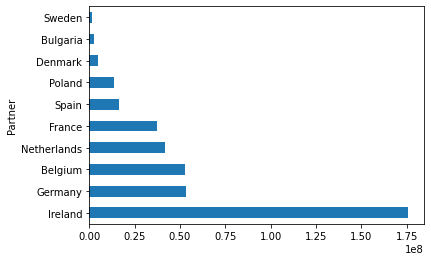

In [9]:
totalImports.head(10).plot(kind='barh')

## Main trade partners

To address the second question, 'Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?', the dataframe is split by country instead, and then each group aggregated for the total trade value. This is done separately for imports and exports. The result is sorted in descending order so that the main partners are at the top.

In [10]:
exports = milk[milk[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head()

The UK exports to 113 countries.
The 5 biggest importers from the UK are:


Partner
Ireland        349085214
China           83724919
Netherlands     83607434
France          44250661
Germany         28982872
Name: Trade Value (US$), dtype: int64

The export values can be plotted as a bar chart, making differences between countries easier to see.

In [25]:
grouped[VALUE].sum() / exports[VALUE].sum() *1000

Partner
Austria                   0.646789
Belgium                  66.150006
Bulgaria                  3.060113
Czech Rep.                0.401997
Denmark                   6.239484
Finland                   0.000040
France                   46.868173
Germany                  66.634700
Greece                    0.016192
Hungary                   0.166169
Ireland                 219.451919
Italy                     0.330868
Latvia                    0.018505
Lithuania                 1.335945
Luxembourg                0.033452
Malta                     0.259605
Netherlands              51.897938
Poland                   17.031026
Portugal                  0.307839
Romania                   1.049563
Slovakia                  0.294011
Spain                    20.467542
Sweden                    1.852889
Switzerland               0.010388
Ukraine                   0.045718
United Arab Emirates      0.003356
United Kingdom            0.002561
Name: Trade Value (US$), dtype: float64

## Bi-directional trade

To address the fourth question, 
'Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country. 

In [13]:
countries = pivot_table(milk, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Algeria,25726408.0,NaN
Angola,1697184.0,NaN
Antigua and Barbuda,74850.0,NaN
Argentina,27807.0,NaN
Australia,6822231.0,NaN


Removing the rows with a missing value will result in only those countries with bi-directional trade flow with the UK.

In [14]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,1292227.0,518038.0
Belgium,25493031.0,52982078.0
Bulgaria,238995.0,2450962.0
Czech Rep.,181927.0,321975.0
Denmark,740655.0,4997442.0
Finland,21544.0,32.0
France,44250661.0,37538518.0
Germany,28982872.0,53370288.0
Greece,1439456.0,12969.0


# conclusions
The milk and cream trade of the UK in the year 2019 was analysed in terms of which countries the UK mostly depends on for income (exports) and goods (imports). Over the period, the UK had a trade surplus of over 100 million US dollars.

Ireland is the main partner, but it imported from the UK almost the triple in value than it exported to the UK.

The Uk exported to over 100 coluntries and imported from 27 countries in the year 2019.

The UK is heavily dependent on its regular customers, the countries that buy all types of milk and cream every month. They contribute three quarters of the total export value.

The UK has bi-directional trade (i.e. both exports and imports) with 25 countries, although for some the trade value (in US dollars) is suspiciously low, which raises questions about the data's accuracy.
